# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether soemthing is one thing or another (there can be multiple things as the options)

Note: Use book version for more info!

## 1.  Make classification data and get it ready


In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
                    

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [5]:
y  # only 0's and 1's

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
# make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


1    500
0    500
Name: label, dtype: int64

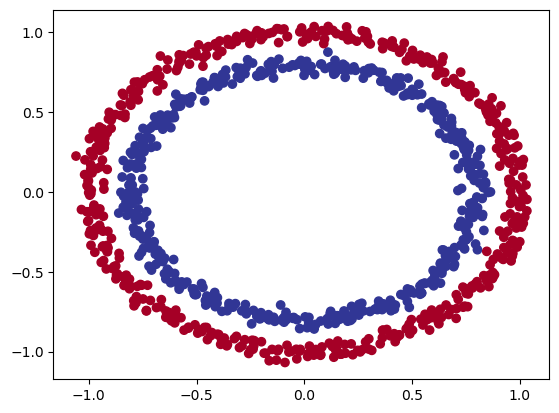

In [7]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
circles.label.value_counts()

**Note:** the data we're working with is oftern referred to as a toy dataset, a dataset that is small enough to experiment and learn but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one saples of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one saples of X: (2,) and the same for y: ()


## 1.2 Turn data into tensors and create train and test splits

In [11]:
# Turn data into tensors
import torch
torch.__version__

'1.13.1'

In [12]:
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [13]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [14]:
X.type, y.type

(<function Tensor.type>, <function Tensor.type>)

In [15]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [16]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.3 = 20 percent of data wil be test and 80 percent will be train)
                                                    random_state=42) # similar to torch.manual_seed

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [18]:
n_samples

1000

## 2.  Building a model

Let's build a model to classify our blue and red dots.

to do so, we want to:
1. Setup device agnostic code so our code will run on a GPU accelerator if there is one!
2. Contruct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [19]:
# Import PyTorch and nn
import torch
from torch import nn
#Make device agnostic code
device  = "cude" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [20]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we have setup device agnostic code, let's create  model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that woutlines the forward pass (or forward computation) of our model
4. Instantiate and instace of our model class and sent it to the target device


In [21]:
# 1. Construct a model that sublcasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 values
        self.layer_2 = nn.Linear(in_features=5, out_features=1) #takes in 5 features from previous layer and outputs a single feature (same shape as y)

        """
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
            ).to(device)
        """

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x))  #x -> layer_1 -> layer2 -> output
    
#4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
device

'cpu'

In [23]:
next(model_0.parameters()).device

device(type='cpu')

In [24]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

#Sublclassing is usually useful because complex systems are easier to see
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5376, -0.1915],
                      [-0.4897, -0.4621],
                      [ 0.3128,  0.6470],
                      [ 0.1486,  0.3906],
                      [-0.1783, -0.1992]])),
             ('0.bias', tensor([ 0.3112,  0.6185, -0.3168,  0.2725, -0.1699])),
             ('1.weight',
              tensor([[ 0.3015, -0.3445, -0.1177,  0.0034,  0.4121]])),
             ('1.bias', tensor([-0.4192]))])

In [26]:
# Make predicitons 
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predicitons: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predicitons: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-1.],
        [-1.],
        [-0.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-0.],
        [-1.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [27]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 2.1 Setup loss function and optimizer

Which loss fucntion or optimizer should you use?

Again... this is problem specific.

For example: 
- MAE or MSE for regressions
- BCE or CCC (cross entropy) for classification

As a reminder, the loss function measures how *wrong* your model's predictions are.
And for optimizers, two of the most common and useful are SGD and Adam, however there are many options.

* For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`, for more on what binary cross entropy is, check out article on towards data science.com

* For different optimizers see `torch.optim`



In [28]:
# Setup the loss function

#loss_fn = nn.BCELoss() # Requires inputs to have fone through sigmoid avtication function prior to inputing it into BCE
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


In [29]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5376, -0.1915],
                      [-0.4897, -0.4621],
                      [ 0.3128,  0.6470],
                      [ 0.1486,  0.3906],
                      [-0.1783, -0.1992]])),
             ('0.bias', tensor([ 0.3112,  0.6185, -0.3168,  0.2725, -0.1699])),
             ('1.weight',
              tensor([[ 0.3015, -0.3445, -0.1177,  0.0034,  0.4121]])),
             ('1.bias', tensor([-0.4192]))])

In [30]:
# Calculate accuracy - out of 100 examples what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## Train Model
To train our model we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step(gradient descent)


### 3.1 Going from raw logits -> prediction probabilites - > prediction lables

Out model outputs are going to be raw **logits.**
We can concert these **logits** into prediction probablitlites by passing them to some kind of actiavation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [31]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
y_logits

tensor([[-0.5694],
        [-0.6251],
        [-0.4804],
        [-0.5944],
        [-0.5706],
        [-0.6038],
        [-0.6890],
        [-0.6843],
        [-0.4767],
        [-0.6298],
        [-0.5655],
        [-0.5881],
        [-0.6907],
        [-0.4782],
        [-0.4627],
        [-0.6455],
        [-0.6477],
        [-0.5394],
        [-0.5405],
        [-0.5103],
        [-0.6263],
        [-0.6622],
        [-0.5252],
        [-0.5175],
        [-0.6773],
        [-0.6826],
        [-0.4927],
        [-0.6300],
        [-0.4546],
        [-0.4926],
        [-0.6606],
        [-0.6754],
        [-0.5759],
        [-0.5334],
        [-0.5659],
        [-0.6264],
        [-0.5891],
        [-0.4769],
        [-0.5155],
        [-0.4835],
        [-0.5188],
        [-0.4806],
        [-0.6470],
        [-0.5641],
        [-0.5789],
        [-0.6336],
        [-0.5856],
        [-0.6259],
        [-0.6160],
        [-0.5902],
        [-0.5902],
        [-0.5822],
        [-0.

In [32]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [33]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilites
y_pred_probs= torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3614],
        [0.3486],
        [0.3822],
        [0.3556],
        [0.3611],
        [0.3535],
        [0.3342],
        [0.3353],
        [0.3830],
        [0.3476],
        [0.3623],
        [0.3571],
        [0.3339],
        [0.3827],
        [0.3864],
        [0.3440],
        [0.3435],
        [0.3683],
        [0.3681],
        [0.3751],
        [0.3484],
        [0.3403],
        [0.3716],
        [0.3734],
        [0.3369],
        [0.3357],
        [0.3793],
        [0.3475],
        [0.3883],
        [0.3793],
        [0.3406],
        [0.3373],
        [0.3599],
        [0.3697],
        [0.3622],
        [0.3483],
        [0.3569],
        [0.3830],
        [0.3739],
        [0.3814],
        [0.3731],
        [0.3821],
        [0.3437],
        [0.3626],
        [0.3592],
        [0.3467],
        [0.3576],
        [0.3484],
        [0.3507],
        [0.3566],
        [0.3566],
        [0.3584],
        [0.3450],
        [0.3664],
        [0.3403],
        [0

In [34]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_prob` < 0.5, `y=0` (class 0)

In [35]:
# Find the predicted labels 
y_preds = torch.round(y_pred_probs)

#In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of the extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

## 3.2 Building a training and testing loop

In [36]:
device

'cpu'

In [73]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train, = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build Training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(torch.sigmoid(y_logits),  # nn. BCELoss exprects prediction probabilites as input
                   y_train)
    loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward (backpropagation)
    loss.backward()

    #5. Optimizer step (gradient descent)
    optimizer.step()


    ### Testing 
    model_0.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. Calculate the test loss/axx
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=y_pred[:len(y_test)])
        
        #Print out what is happening
        if epoch % 10 == 0:
        
            print(f"EpochL {epoch} | Loss: {loss:.5f}, Acc{acc:2f}% | Test loss: {test_loss: .5f}, Test acc: {test_acc: .2f}%")
        

EpochL 0 | Loss: 0.69299, Acc50.750000% | Test loss:  0.69468, Test acc:  42.00%
EpochL 10 | Loss: 0.69299, Acc50.750000% | Test loss:  0.69468, Test acc:  42.00%
EpochL 20 | Loss: 0.69299, Acc50.875000% | Test loss:  0.69468, Test acc:  42.50%
EpochL 30 | Loss: 0.69299, Acc50.875000% | Test loss:  0.69468, Test acc:  42.50%
EpochL 40 | Loss: 0.69299, Acc50.750000% | Test loss:  0.69468, Test acc:  43.00%
EpochL 50 | Loss: 0.69299, Acc50.750000% | Test loss:  0.69468, Test acc:  43.00%
EpochL 60 | Loss: 0.69299, Acc50.750000% | Test loss:  0.69468, Test acc:  43.00%
EpochL 70 | Loss: 0.69299, Acc50.750000% | Test loss:  0.69468, Test acc:  43.00%
EpochL 80 | Loss: 0.69299, Acc50.750000% | Test loss:  0.69468, Test acc:  43.00%
EpochL 90 | Loss: 0.69299, Acc50.750000% | Test loss:  0.69469, Test acc:  43.00%


## 4. Make predictions and evaluate the model

From the metric it looks like our model isn't learning anything ...

So to inspect ir let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we are going to import a function called `plot_decision_boundary()`


In [74]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo (if it is not already downloaded)
if(Path("helper_functions.py").is_file()):
    print("helper functions exists!")
else:
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper functions exists!


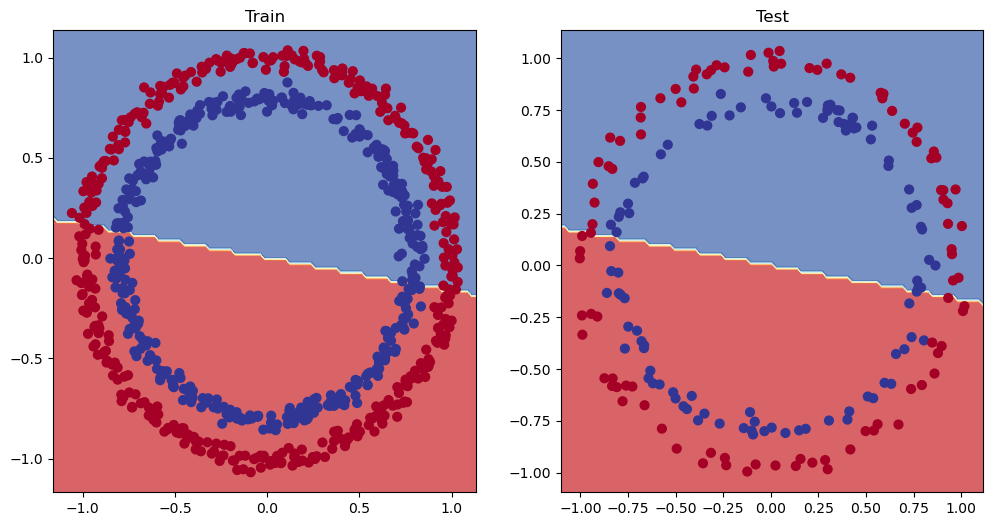

In [75]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)